In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import shap
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

net=pd.read_csv("/content/drive/MyDrive/internet_service_churn.csv")

In [ ]:
net.fillna(0,inplace=True)
x=net.drop(columns=["churn","id"])
y=net["churn"]
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.3,random_state=20)

In [ ]:
dtc=DecisionTreeClassifier()
dtt=dtc.fit(xtr,ytr)
dtp=dtc.predict(xts)

#metodo sklearn necessida de uso print
print(classification_report(yts,dtp))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      9663
           1       0.92      0.91      0.92     12020

    accuracy                           0.91     21683
   macro avg       0.91      0.91      0.91     21683
weighted avg       0.91      0.91      0.91     21683



In [ ]:
explainer=shap.TreeExplainer(dtc)
shap_values=explainer.shap_values(xtr)

In [ ]:
#é mesmo coisa mas se torna mais util a de cima
shap.TreeExplainer(dtc).shap_values(xtr)

[array([[-2.46355294e-02,  8.28201723e-04, -1.48358747e-03, ...,
          1.50019565e-02,  3.26870944e-03, -4.94449854e-04],
        [-6.46025657e-02, -4.23277672e-05, -1.23628046e-03, ...,
          6.47830280e-03, -1.30681884e-04, -3.40934342e-04],
        [-9.87479310e-02, -5.34238123e-04, -4.53243418e-04, ...,
          4.45437089e-03,  5.29150573e-03, -3.81160460e-04],
        ...,
        [-1.24812096e-01, -1.82251697e-03,  1.67514790e-03, ...,
          2.90891123e-03, -7.76301999e-03, -1.39047836e-03],
        [ 1.57614288e-01,  3.09515508e-04, -1.32251867e-03, ...,
          2.09476186e-02,  4.09538375e-03,  5.60871648e-05],
        [-1.15821292e-01, -4.10302755e-04,  5.48617623e-04, ...,
          2.82291552e-04,  7.83313870e-05, -4.04656710e-04]]),
 array([[ 2.46355294e-02, -8.28201723e-04,  1.48358747e-03, ...,
         -1.50019565e-02, -3.26870944e-03,  4.94449854e-04],
        [ 6.46025657e-02,  4.23277672e-05,  1.23628046e-03, ...,
         -6.47830280e-03,  1.30681884e

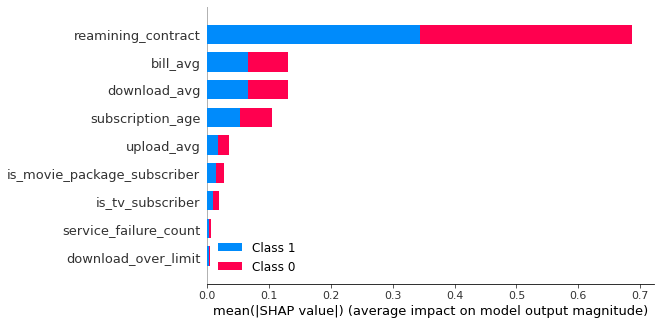

In [ ]:
shap.summary_plot(shap_values,xtr)

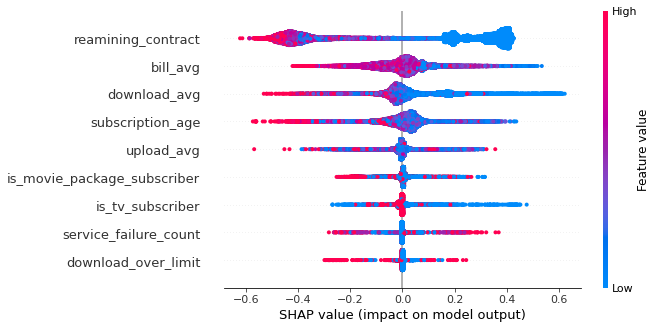

In [ ]:
shap.summary_plot(shap_values[1],xtr)

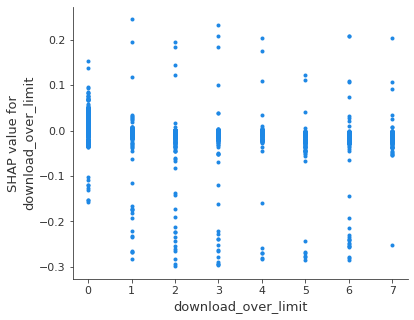

In [ ]:
shap.dependence_plot("download_over_limit",shap_values[1],xtr,interaction_index=None)